In [1]:
pip install psycopg2

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import psycopg2

In [35]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5433")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [36]:
con = PostgresConnection().getConnection()

successfully connected to database


In [6]:
cur = con.cursor()
select_stmt = "SELECT t.payment_key , t.trans_type, t.bank_name " \
              "FROM ecomdb_star_schema.trans_dim t"
cur.execute(select_stmt)
records = cur.fetchall()

In [7]:
trans_df = pd.DataFrame(list(records), columns=['payment_key', 'trans_type', 'bank_name'])
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payment_key  39 non-null     object
 1   trans_type   39 non-null     object
 2   bank_name    39 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


### Simple queries

In [8]:
cur = con.cursor()
select_query = "select s.division , sum(f.total_price)\
                from ecomdb.fact_table f \
                join ecomdb.store_dim s on s.store_key = f.store_key \
                group by (s.division)\
                order by s.division"
cur.execute(select_query)
records = cur.fetchall()
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25'))]

In [9]:
query_1 = pd.DataFrame(list(records),columns = ['division','total_price'])
query_1.head()
# query_1['total_price'] = query_1['total_price'].astype('Int64')
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   division     7 non-null      object
 1   total_price  7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [10]:
query_1.head()

,division,total_price
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00


In [11]:
query_1['total_price'] = query_1['total_price'].astype(int)
query_1.head()

,division,total_price
0,BARISAL,7520343
1,CHITTAGONG,19763595
2,DHAKA,40764619
3,KHULNA,11311610
4,RAJSHAHI,12099196


In [12]:
import matplotlib.pyplot as plt
import numpy as np


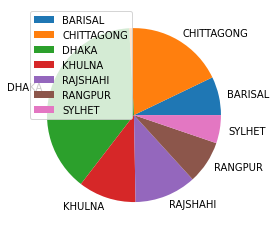

In [13]:
plt.pie(query_1.total_price, labels = query_1.division)
# plt.pie(query_1.total_price,query_1.division)
plt.legend()
plt.show() 

In [14]:
cur = con.cursor()
select_query = "select c.name , sum(f.total_price)\
                from ecomdb.fact_table f \
                join ecomdb.coustomer_dim c on c.coustomer_key = f.coustomer_key \
                group by (c.name)"
cur.execute(select_query)
records = cur.fetchall()
# records

In [15]:
query_2 = pd.DataFrame(list(records),columns = ['Customer_name','total_price'])
query_2.head()

,Customer_name,total_price
0,pratibha devi,12703.25
1,maina devi,13636.50
2,mohit maan,11591.00
3,tumpa mundal,14591.00
4,suman devi,21477.75


In [16]:
# plt.bar(query_2.Customer_name,query_2.total_price)

In [17]:
cur = con.cursor()
select_query = "select s.division , sum(f.total_price)\
                from ecomdb.fact_table f \
                join ecomdb.store_dim s on s.store_key = f.store_key \
                where s.division = 'BARISAL'\
                group by (s.division)"
cur.execute(select_query)
records = cur.fetchall()
records

[('BARISAL', Decimal('7520343.75'))]

In [18]:
query_3 = pd.DataFrame(list(records),columns=['district','total_sales'])
query_3.head()

,district,total_sales
0,BARISAL,7520343.75


In [19]:
# plt.bar(query_3.district , query_3.total_sales)

In [20]:
cur = con.cursor()
select_query = "select  t.year, sum(f.total_price) \
                from ecomdb.fact_table f \
                join ecomdb.time_dim t on f.time_key=t.time_key \
                where t.year=2015 \
                group by t.year"
cur.execute(select_query)
records = cur.fetchall()
records


[(Decimal('2015'), Decimal('15095720.25'))]

In [21]:
query_4 = pd.DataFrame(list(records),columns = ['year','total_sales'])
query_4.head()

,year,total_sales
0,2015,15095720.25


In [22]:
cur = con.cursor()
select_query = "select  s.division , t.year, sum(f.total_price) \
                from ecomdb.fact_table f \
                join ecomdb.time_dim t on f.time_key=t.time_key \
                join ecomdb.store_dim s on s.store_key = f.store_key \
                where t.year=2015  and s.division = 'BARISAL' \
                group by (t.year,s.division)"
cur.execute(select_query)
records = cur.fetchall()
records


[('BARISAL', Decimal('2015'), Decimal('1076902.75'))]

In [24]:
query_5 = pd.DataFrame(list(records),columns = ['districs','year','totale_sales'])
query_5.head()

,districs,year,totale_sales
0,NINGBO SEDUNO IMP & EXP CO.LTD,Hand Sanitizer Refill Pump,3487
1,NINGBO SEDUNO IMP & EXP CO.LTD,Waterloo Sparkling Blackcherry 12oz,3520
2,NINGBO SEDUNO IMP & EXP CO.LTD,Cheetos Flamin' Hot 1 oz,3696
3,NINGBO SEDUNO IMP & EXP CO.LTD,Pepsi - 12 oz cans,3982
4,NINGBO SEDUNO IMP & EXP CO.LTD,Sobe Zero Lifewater Variety 20 oz,4026


### Complex level #########

In [25]:
cur = con.cursor()
select_query = "select  i.supplier,i.item_name,  sum(f.quantity) \
                from ecomdb.fact_table f\
                join ecomdb.item_dim i on f.item_key=i.item_key \
                group by (i.supplier,i.item_name,f.quantity) \
                order by (i.supplier,f.quantity) desc "
cur.execute(select_query)
records = cur.fetchall()
# records


In [26]:
query_6 = pd.DataFrame(list(records),columns = ['supplier','item_name','quantity'])
query_6.head()

,supplier,item_name,quantity
0,NINGBO SEDUNO IMP & EXP CO.LTD,Sugar in the Raw Packets,3850
1,NINGBO SEDUNO IMP & EXP CO.LTD,K Cups Folgers Lively Columbian,3729
2,NINGBO SEDUNO IMP & EXP CO.LTD,M&M Peanut Butter 1.6 oz,3762
3,NINGBO SEDUNO IMP & EXP CO.LTD,Hand Sanitizer Refill Pump,3487
4,NINGBO SEDUNO IMP & EXP CO.LTD,Cheetos Flamin' Hot 1 oz,3696


In [27]:
query_6

,supplier,item_name,quantity
0,NINGBO SEDUNO IMP & EXP CO.LTD,Sugar in the Raw Packets,3850
1,NINGBO SEDUNO IMP & EXP CO.LTD,K Cups Folgers Lively Columbian,3729
2,NINGBO SEDUNO IMP & EXP CO.LTD,M&M Peanut Butter 1.6 oz,3762
3,NINGBO SEDUNO IMP & EXP CO.LTD,Hand Sanitizer Refill Pump,3487
4,NINGBO SEDUNO IMP & EXP CO.LTD,Cheetos Flamin' Hot 1 oz,3696
...,...,...,...
2899,BIGSO AB,Frito Bold Flavors Variety,347
2900,BIGSO AB,Foam Coffee Cups - 12 ounce,347
2901,BIGSO AB,Coke Classic 12 oz cans,280
2902,BIGSO AB,Diet Coke - 12 oz cans,374


In [28]:
query_6 = query_6.set_index('item_name').groupby("supplier")['quantity'].nlargest(3).reset_index()
query_6

,supplier,item_name,quantity
0,BIGSO AB,Kind Bars Variety Pack 1.4 oz,4191
1,BIGSO AB,La Croix Sparkling Cran-Raspberry 12 oz,4125
2,BIGSO AB,"Dawn Ultra Dish Detergent, Original Scent",4114
3,Bolsius Boxmeer,Diet Coke - 12 oz cans,4422
4,Bolsius Boxmeer,Reese's Pieces Peanutbutter Candy,4081
5,Bolsius Boxmeer,Pure Leaf Sweet Tea 8.5oz,4026
6,"CHERRY GROUP CO.,LTD",Wonderful Pistachios (in shell),4004
7,"CHERRY GROUP CO.,LTD",Stirrers Coffee Stirs 7inch,3960
8,"CHERRY GROUP CO.,LTD",Tejava Unsweetened Black Tea 16.9oz,3905
9,CHROMADURLIN S.A.S,Planters Nut Variety Packs,4114


In [29]:
x = len(query_6)
print(x)
# i = 0
for i in range(0,x):
    if(i%3 != 0):
        print(i)
        query_6.iloc[i,0]=''
#             print(query_6['supplier'])
#             query_6['supplier']=" "
            

30
1
2
4
5
7
8
10
11
13
14
16
17
19
20
22
23
25
26
28
29


In [30]:
query_6

,supplier,item_name,quantity
0,BIGSO AB,Kind Bars Variety Pack 1.4 oz,4191
1,,La Croix Sparkling Cran-Raspberry 12 oz,4125
2,,"Dawn Ultra Dish Detergent, Original Scent",4114
3,Bolsius Boxmeer,Diet Coke - 12 oz cans,4422
4,,Reese's Pieces Peanutbutter Candy,4081
5,,Pure Leaf Sweet Tea 8.5oz,4026
6,"CHERRY GROUP CO.,LTD",Wonderful Pistachios (in shell),4004
7,,Stirrers Coffee Stirs 7inch,3960
8,,Tejava Unsweetened Black Tea 16.9oz,3905
9,CHROMADURLIN S.A.S,Planters Nut Variety Packs,4114


In [46]:
x = input('enter a number : ')

enter a number : 450


In [53]:
cur = con.cursor()
select_query = '''select i.item_name 
from ecomdb.fact_table f 
join ecomdb.trans_dim t on t.payment_key=f.payment_key 
join ecomdb.item_dim i on i.item_key=f.item_key 
join ecomdb.time_dim td on td.time_key = f.time_key 
where (t.trans_type='card' or t.trans_type='mobile') and td.date > (CURRENT_DATE - integer '{}')'''.format(x)
# ''''group by cube(i.item_name,tr.trans_type,t.date) 
#      order by (i.item_name) desc '''
cur.execute(select_query)
records = cur.fetchall()



In [54]:
query_7 = pd.DataFrame(list(records),columns = ['item_name'])
query_7

,item_name
0,Diet Fuze Iced Tea
1,Fresca Original - 12 oz cans
2,Fresca Original - 12 oz cans
3,Njoy Creamer Packs
4,French Vanilla International Delight
...,...
14641,Paper Bowls 20 oz Ultra Strong
14642,Coffee-Mate Original Flavor Cold
14643,Breath Savers Peppermints 12/roll
14644,Tylenol Extra Strength 2 pill packets


### Worst season ########

In [58]:
cur = con.cursor()
select_query = "select i.item_name, \
                t.quarter,  \
                sum(f.quantity) \
                from ecomdb.fact_table f \
                join ecomdb.item_dim i on i.item_key = f.item_key \
                join ecomdb.time_dim t on t.time_key = f.time_key \
                group by (i.item_name , t.quarter ) \
                order by (i.item_name)"
# group by cube(i.item_name,tr.trans_type,t.date) "
# -- order by (i.item_name) desc "
cur.execute(select_query)
records = cur.fetchall()
# records



In [59]:
query_8 = pd.DataFrame(list(records),columns = ['item_name','quarter','quantity'])
query_8

,item_name,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,100% Juice Box Variety 6.75 oz,Q2,5876
2,100% Juice Box Variety 6.75 oz,Q3,6045
3,100% Juice Box Variety 6.75 oz,Q4,5806
4,A&W Root Beer - 12 oz cans,Q1,5965
...,...,...,...
1031,Yoplait Original Yogurt Variety Pack,Q4,5737
1032,Zoo Animal Cookies/Crackers,Q1,5462
1033,Zoo Animal Cookies/Crackers,Q2,5508
1034,Zoo Animal Cookies/Crackers,Q3,5701


In [60]:
query_8 = query_8.set_index('quarter').groupby("item_name")['quantity'].nsmallest(1).reset_index()
query_8

,item_name,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,A&W Root Beer - 12 oz cans,Q2,5735
2,A&W Root Beer Diet - 12 oz cans,Q4,5589
3,Advil 2 pill packets,Q1,5453
4,All Purpose Cleaner 409 Spray,Q1,5325
...,...,...,...
254,Welch's 100% Juice Variety10 oz,Q2,5494
255,Wint O Green LifeSavers Sugar Free,Q1,5323
256,Wonderful Pistachios (in shell),Q1,5578
257,Yoplait Original Yogurt Variety Pack,Q1,5426


In [61]:
# cur = con.cursor()
# select_query = '''select i.item_name, s.division, sum(f.total_price) 
#                 "from ecomdb.fact_table f 
#                 "join ecomdb.item_dim i on i.item_key = f.item_key 
#                 "join ecomdb.store_dim s on s.store_key = f.store_key 
#                 "group by (s.division,i.item_name) 
#                 "order by (s.division)'''
# cur.execute(select_query)
# records = cur.fetchall()
# records


In [62]:
cur = con.cursor()
select_query = '''select   
                s.store_key,
                t.month,
                avg(f.total_price) 
                from ecomdb.fact_table f
                join ecomdb.time_dim t on t.time_key = f.time_key 
                join ecomdb.store_dim s on s.store_key = f.store_key 
                group by cube (s.store_key,t.month)    
                order by (s.store_key)'''
cur.execute(select_query)
records = cur.fetchall()
# records

In [63]:
query_10 = pd.DataFrame(list(records),columns = ['store_key','month','avg sales'])
query_10

,store_key,month,avg sales
0,S0001,1,97.7543103448275862
1,S0001,6,101.2459349593495935
2,S0001,12,107.8697478991596639
3,S0001,9,96.1901041666666667
4,S0001,10,104.6166666666666667
...,...,...,...
9446,None,2,105.5077818723537714
9447,None,12,105.6896222951285665
9448,None,4,105.0876045669661061
9449,None,11,105.9146828059985602


In [56]:
query_10

In [ ]:
aa..